In [1]:
library(e1071)
library(repr) #改变绘图大小


[1] 200

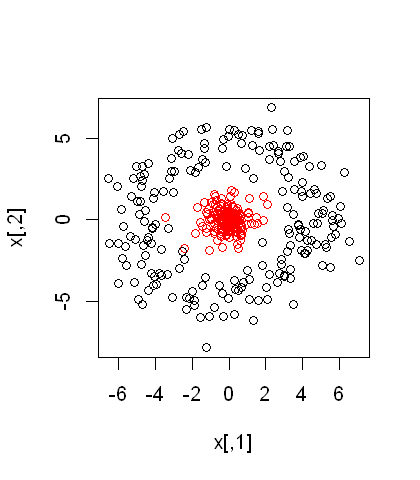

In [7]:
## Exercise 4

# Parapraing trainning data
N = 400
R1 = abs(rnorm(N/2))
R2 = abs(rnorm(N/2) +5)
Theta=2.0*pi*runif(N)
x1i = R1*cos(Theta[1:(N/2)])
x1o = R2*cos(Theta[(N/2+1):N])
x2i = R1*sin(Theta[1:(N/2)])
x2o = R2*sin(Theta[(N/2+1):N])
y = c(rep(1,N/2), rep(-1,N/2))
x1 = c(x1i, x1o)
x2 = c(x2i, x2o)
x = matrix(c(x1,x2), ncol=2)
options(repr.plot.width=3.5, repr.plot.height=4) #改变绘图大小
plot(x, col=(y+3)/2)
length(x2o)

In [24]:
dat = data.frame(x=x, y=as.factor(y))
svmfit = svm(y~., data=dat, kernel = "radial", cost=1, gamma=1, scale=FALSE) #scale=FALSE不要对数据作zero mean 和 unit variance处理
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "radial", cost = 1, gamma = 1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 

Number of Support Vectors:  134

 ( 27 107 )


Number of Classes:  2 

Levels: 
 -1 1




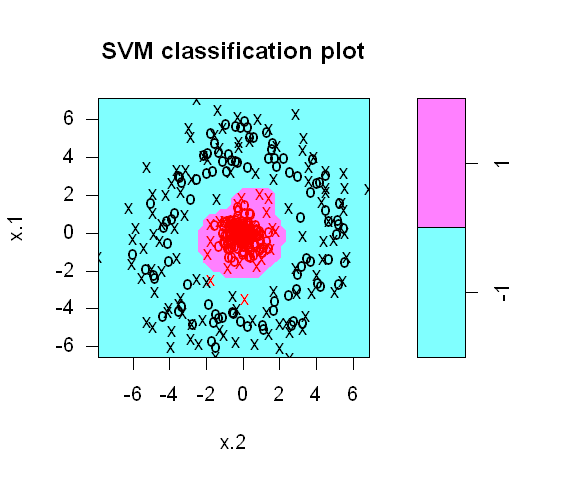

In [25]:
options(repr.plot.width=4.7, repr.plot.height=4) #改变绘图大小
plot(svmfit, dat)

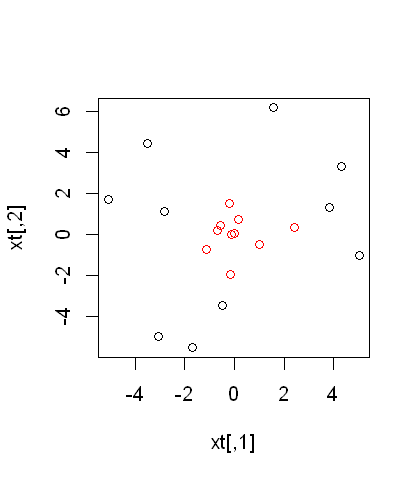

In [26]:
# Parapraing testing data
Nt = 20
R1t = abs(rnorm(Nt/2))
R2t = abs(rnorm(Nt/2) +5)
Thetat=2.0*pi*runif(Nt)
x1it = R1t*cos(Thetat[1:(Nt/2)])
x1ot = R2t*cos(Thetat[(Nt/2+1):Nt])
x2it = R1t*sin(Thetat[1:(Nt/2)])
x2ot = R2t*sin(Thetat[(Nt/2+1):Nt])
yt = c(rep(1,Nt/2), rep(-1,Nt/2))
x1t = c(x1it, x1ot)
x2t = c(x2it, x2ot)
xt = matrix(c(x1t,x2t), ncol=2)
options(repr.plot.width=3.5, repr.plot.height=4) #改变绘图大小
plot(xt, col=(yt+3)/2)

In [27]:
table(true=yt, pred=predict(svmfit, newdata=xt))

    pred
true -1  1
  -1 10  0
  1   0 10